In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Criação de Gráficos
import seaborn as sns  # Criação de Gráficos
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-dataset/car_price_dataset.csv


# Análise e previsão dos valores dos carros

*O objetivo da análise é entender o comportamento dos dados, criar gráficos e escolher o melhor modelo de machine learning para ajudar na previsão dos valores dos carros*

*O projeto está separado nos tópicos abaixo:*

***1 - Importação do dataset e análise exploratória***

***2 - Análise gráfica dos agrupamentos***

***3 - Correlação e teste dos modelos de machine learning***

***4 - Conclusão da análise***

# Importação do dataset e análise exploratória

In [2]:
df = pd.read_csv('/kaggle/input/car-price-dataset/car_price_dataset.csv')
df.head(3)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171


In [3]:
# Verificar os tipos de dados, se tem valores nulos e a quantidade de colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [4]:
# Verificando os valores máximos, mínimos, quartis das colunas númericas
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [5]:
# Verificar se tem valores duplicados no dataset
df.duplicated().sum()

0

In [6]:
# Verificar se tem valores nulos no dataset
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [7]:
# Transformando as colunas [Price,Mileage] para tipo float (número real)
df['Price'] = df['Price'].astype(float)
df['Mileage'] = df['Mileage'].astype(float)

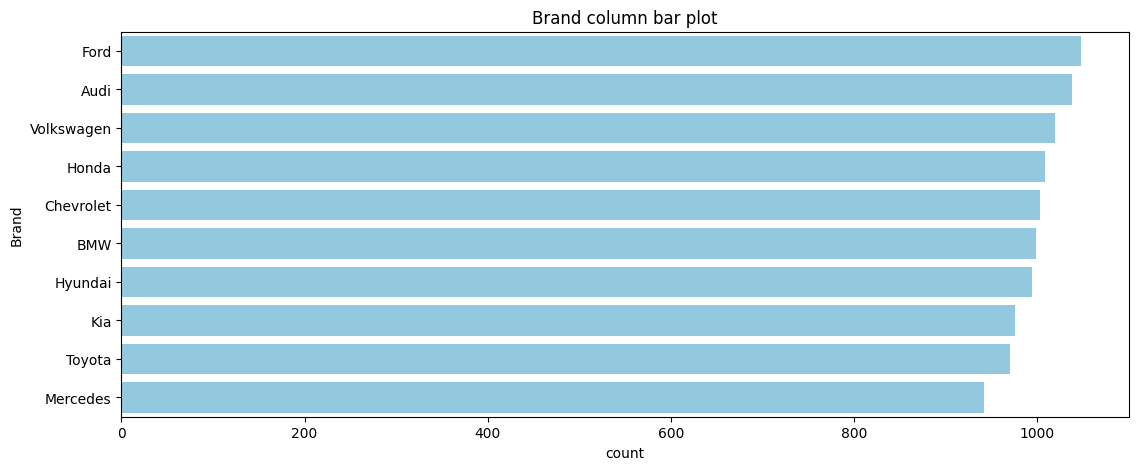

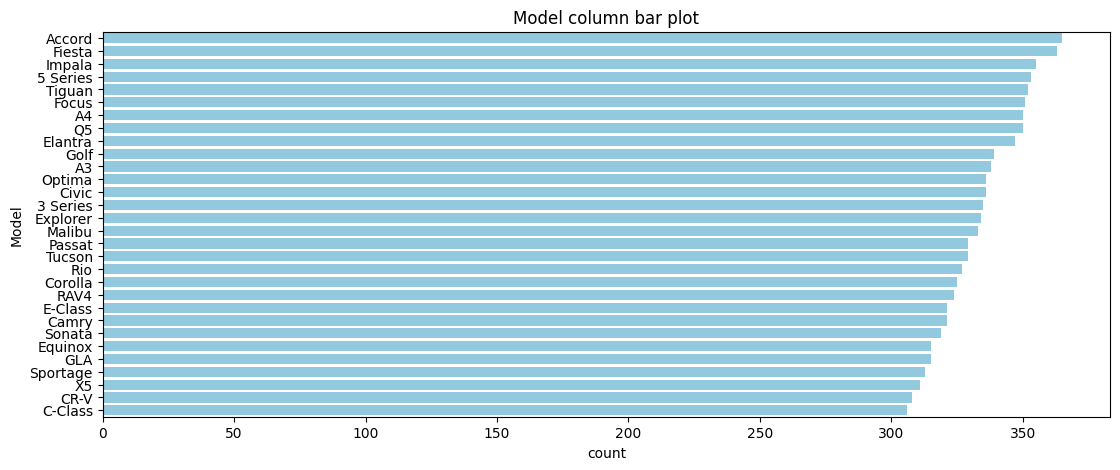

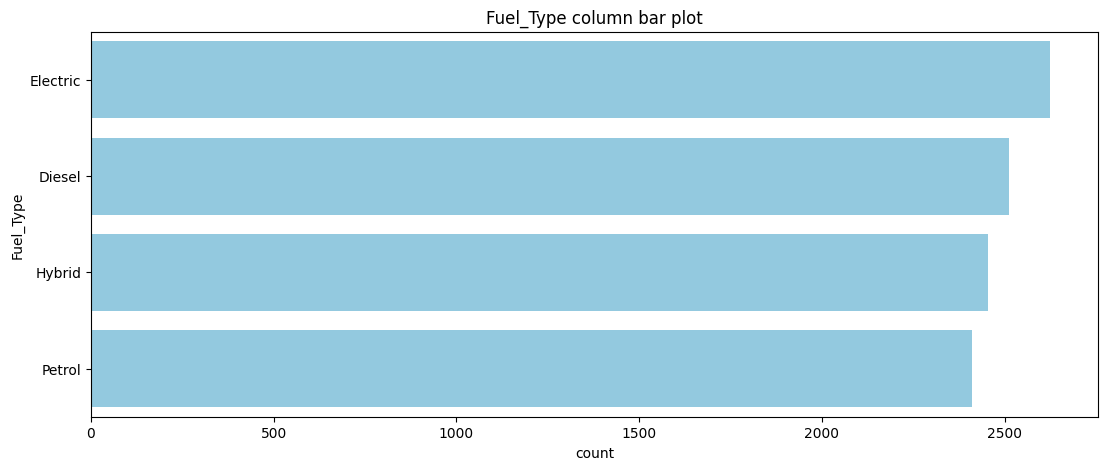

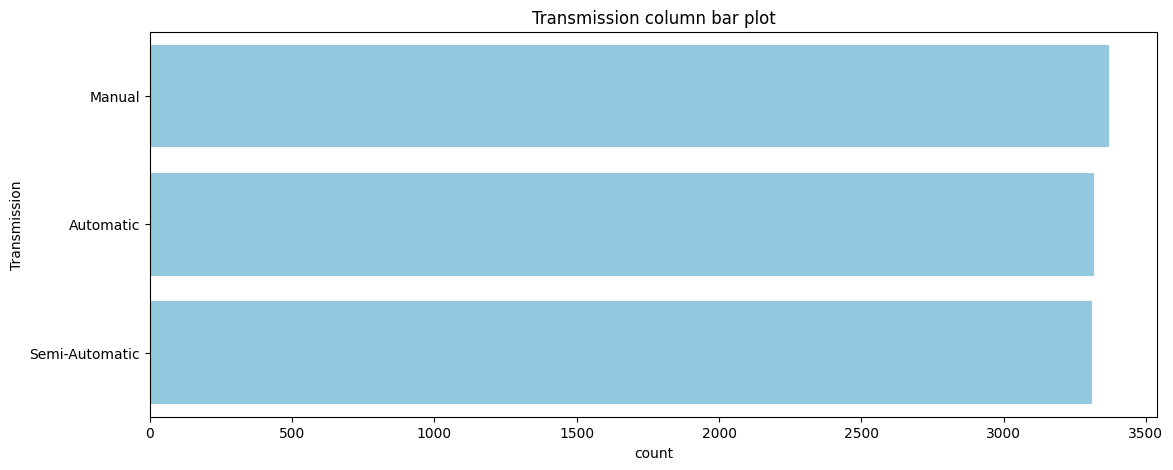

In [8]:
# Visualizando atráves de gráficos o tamanho dos itens em cada coluna categórica
for col in df.select_dtypes(include = 'object').columns:
    plt.figure(figsize = (13,5))
    groupby = df.groupby(col).size().reset_index(name='count').sort_values(by='count',ascending=False)
    sns.barplot(groupby, x = groupby['count'].values, y = groupby[col].values, color = 'skyblue')
    plt.title(f'{col} column bar plot')
    plt.xlabel('count')
    plt.ylabel(col)
    plt.show()

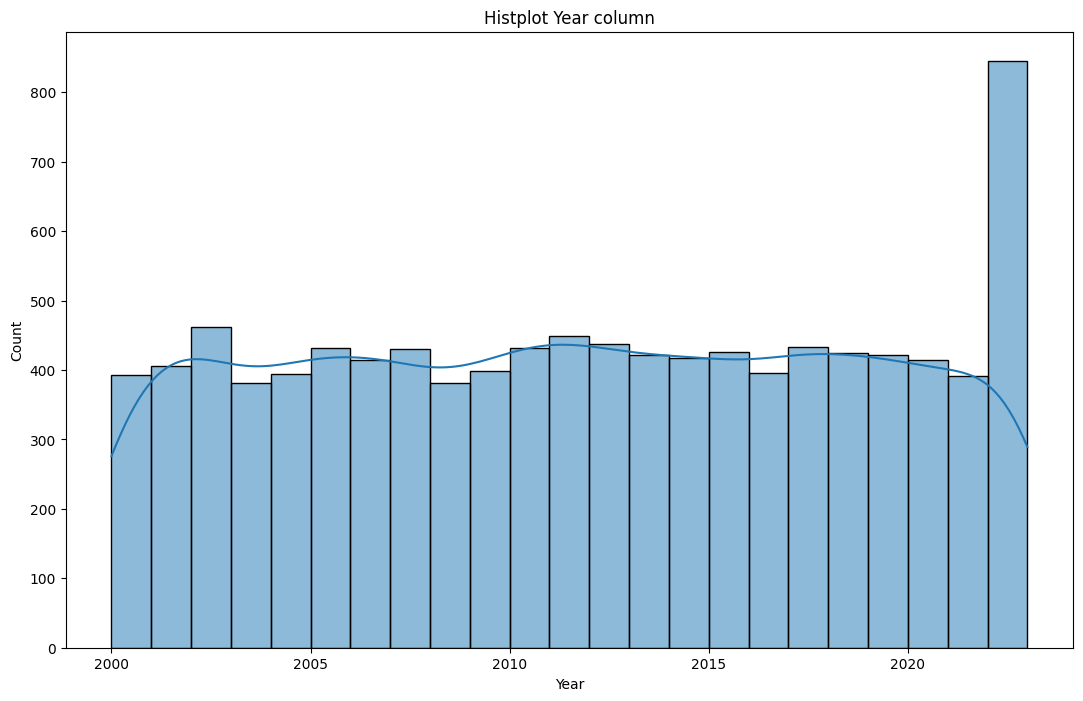

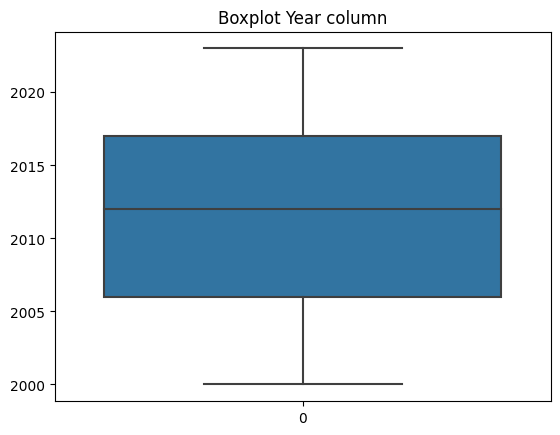

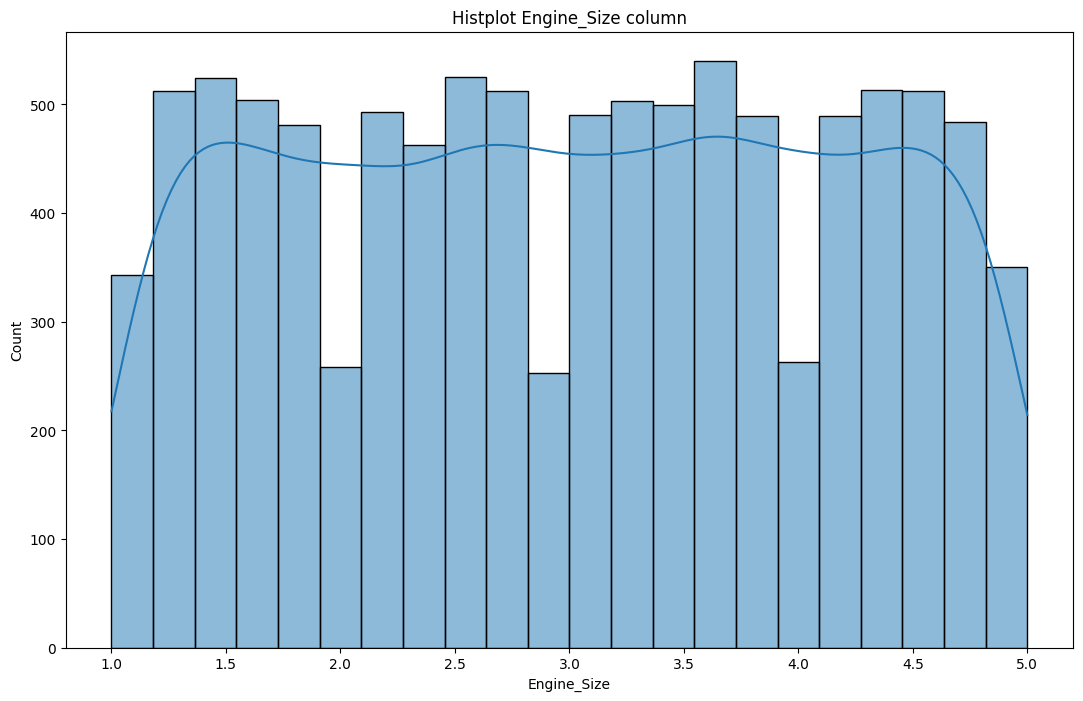

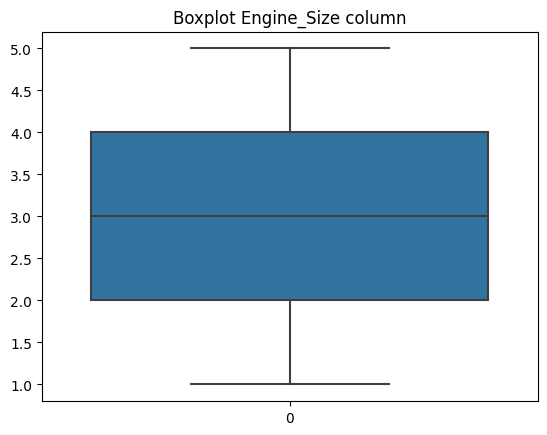

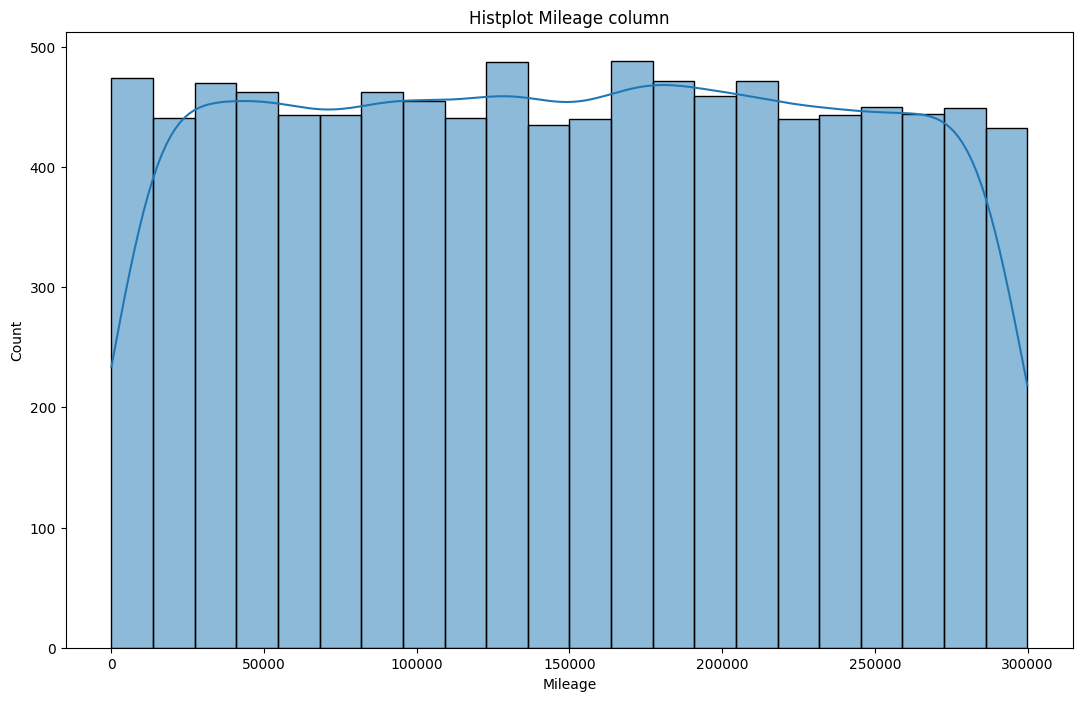

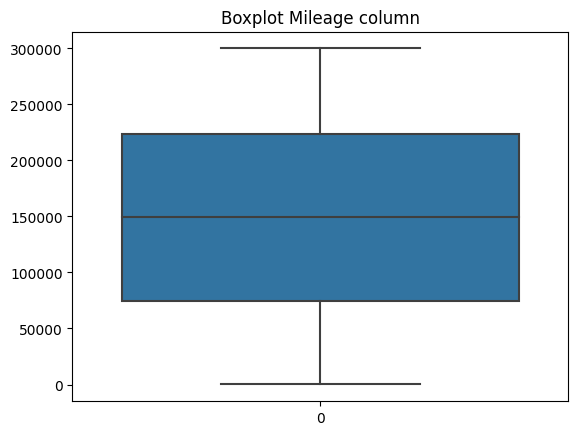

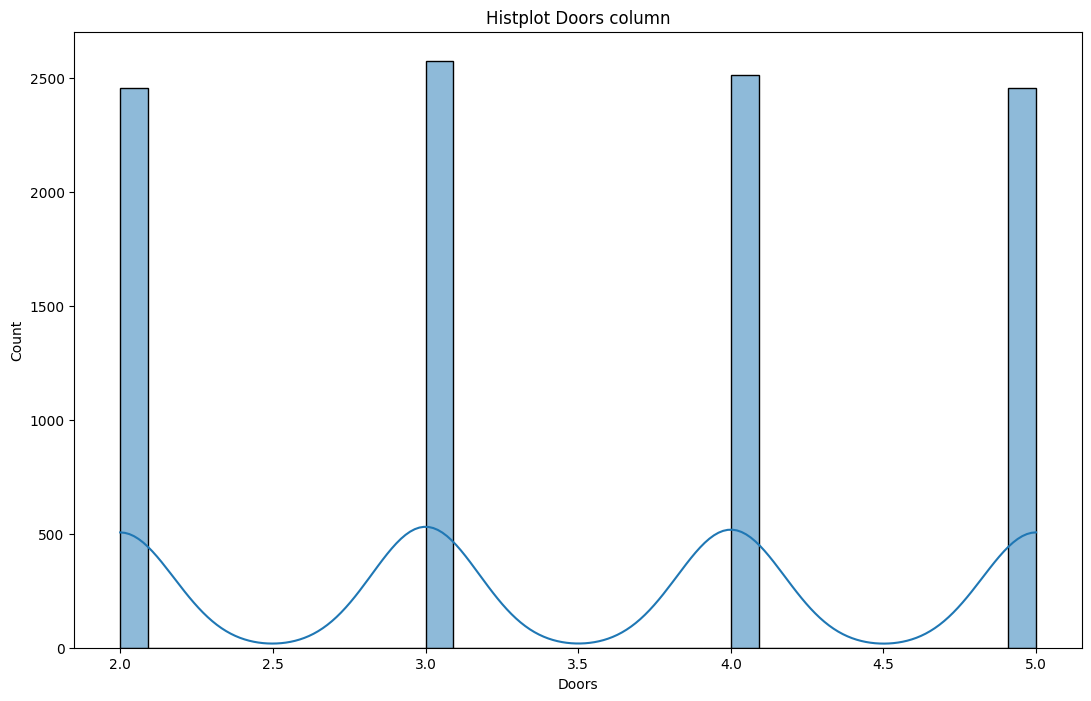

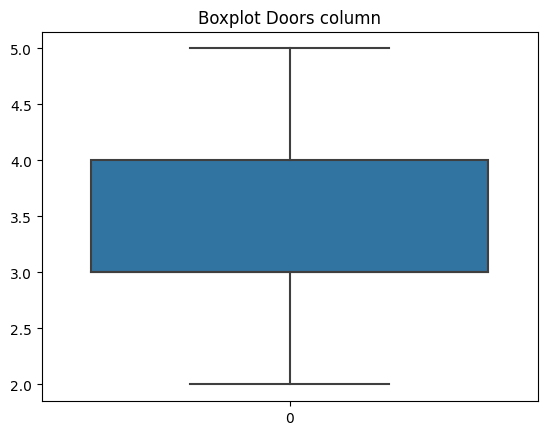

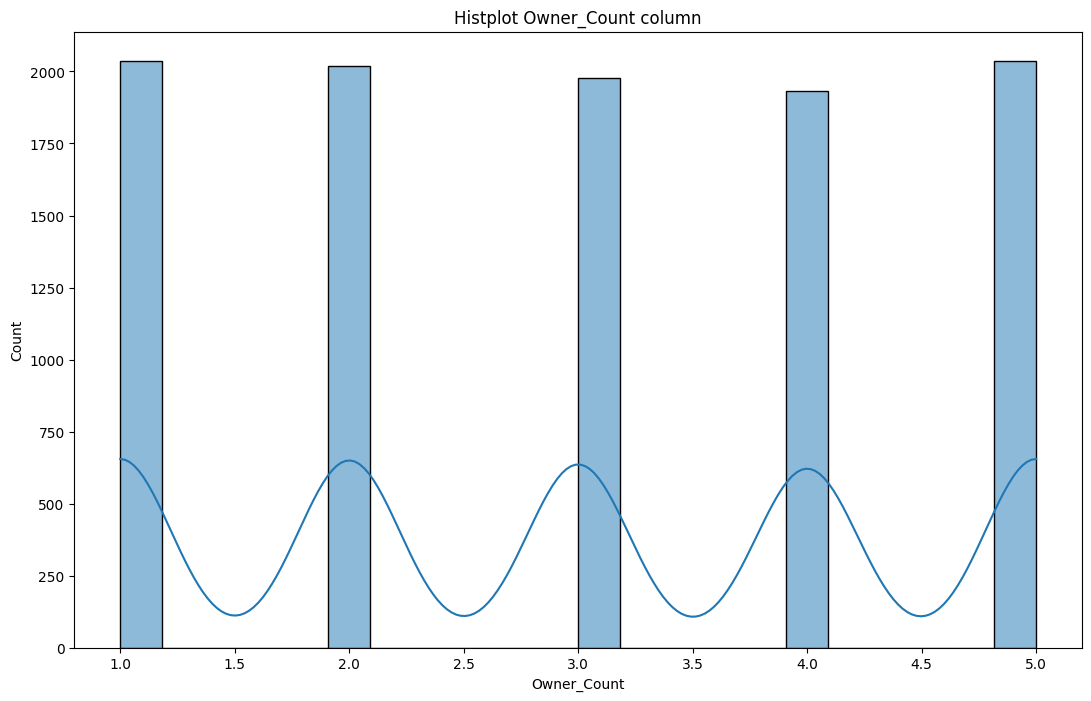

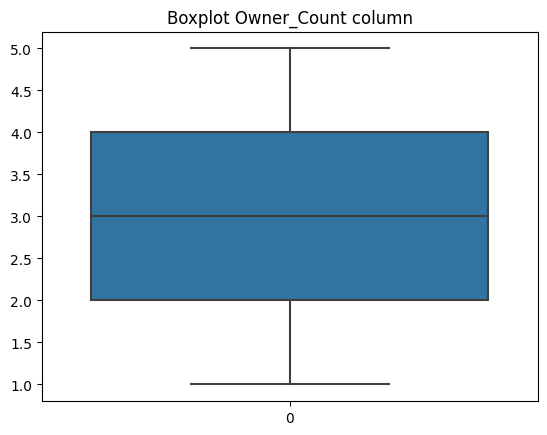

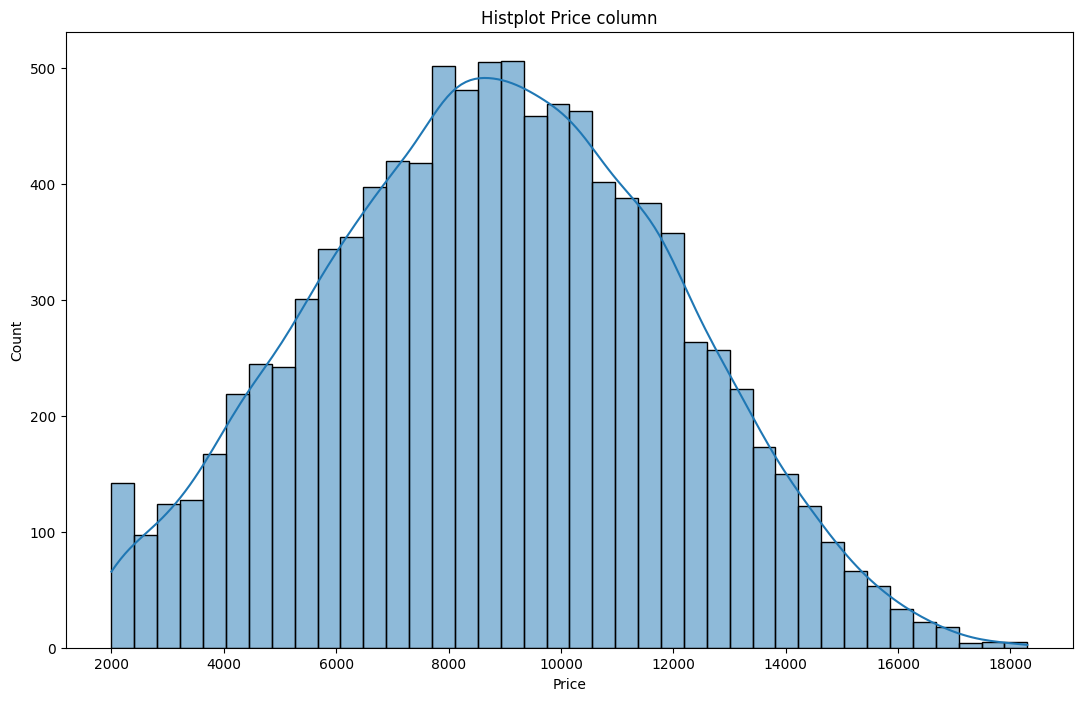

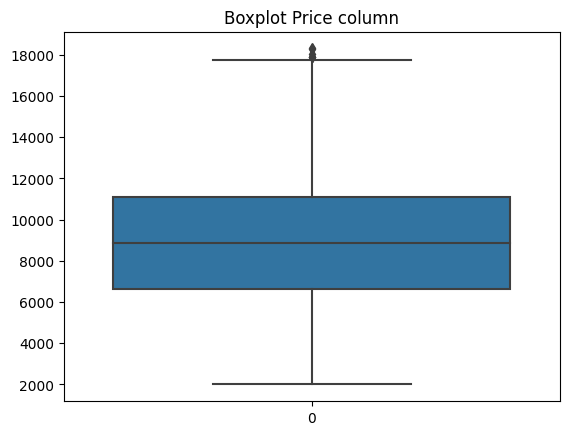

In [9]:
# Verificando os gráficos de boxplot e histplot das colunas númericas
# Análisar como está distribuido os valores e se tem valores muito acima ou abaixo da mediana
for col in df.select_dtypes(exclude = 'object').columns:
    plt.figure(figsize = (13,8))
    sns.histplot(df[col], kde = True)
    plt.title(f'Histplot {col} column')
    plt.show()
    sns.boxplot(df[col])
    plt.title(f'Boxplot {col} column')
    plt.show()

# Análise gráfica dos agrupamentos

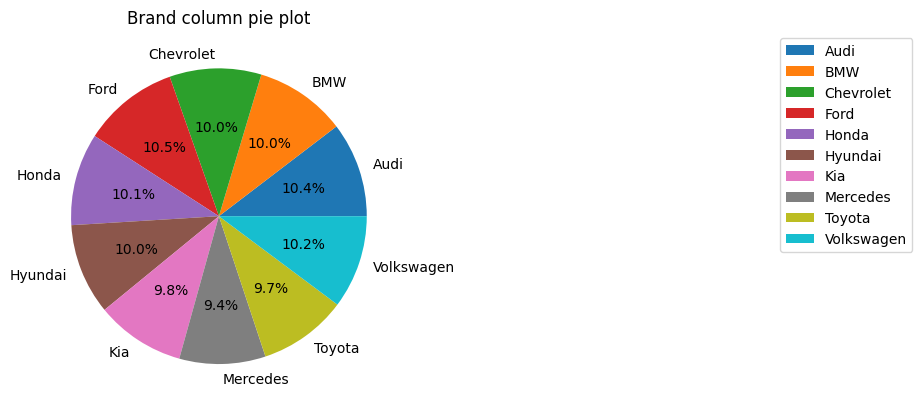

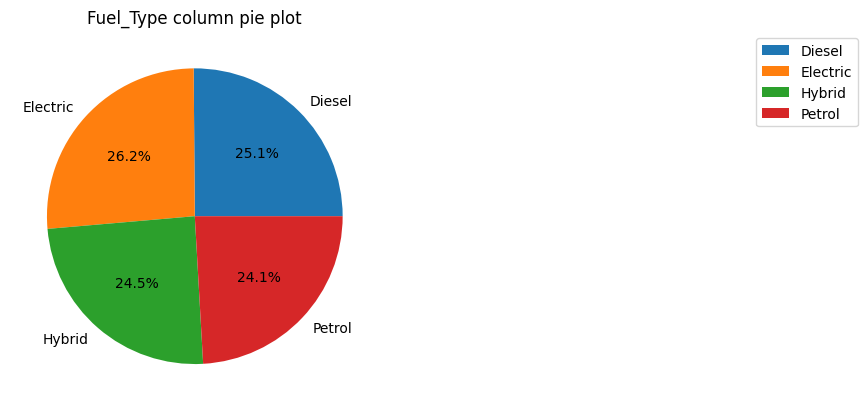

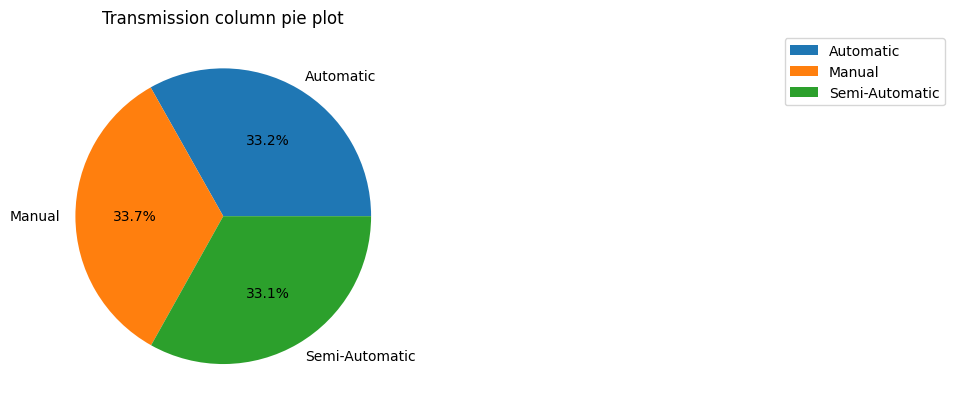

In [10]:
# Verificando atráves do gráfico pie plot o percentual de cada item das colunas categóricas
for col in df[['Brand','Fuel_Type','Transmission']].columns:
    groupby = df.groupby(col).size().reset_index(name='count')
    plt.pie(groupby['count'].values, labels = groupby[col].values, autopct = '%1.1f%%')
    plt.title(f'{col} column pie plot')
    plt.legend(loc="upper left", bbox_to_anchor=(2, 1))
    plt.show()

<Axes: xlabel='Year', ylabel='annual revenue'>

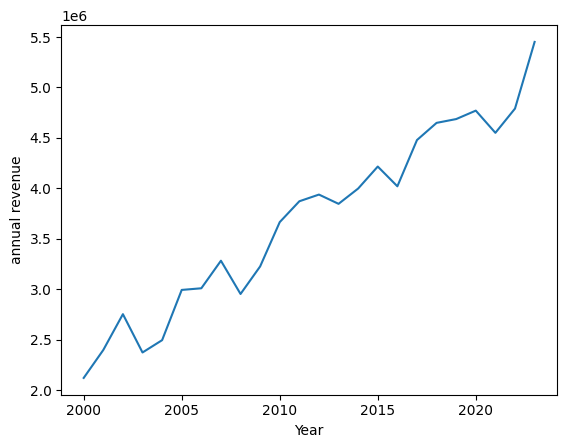

In [11]:
# Análisando o faturamento anual atráves do gráfico de linha
groupby = df.groupby('Year')['Price'].sum().reset_index(name='annual revenue')
sns.lineplot(groupby, x = 'Year', y = 'annual revenue')

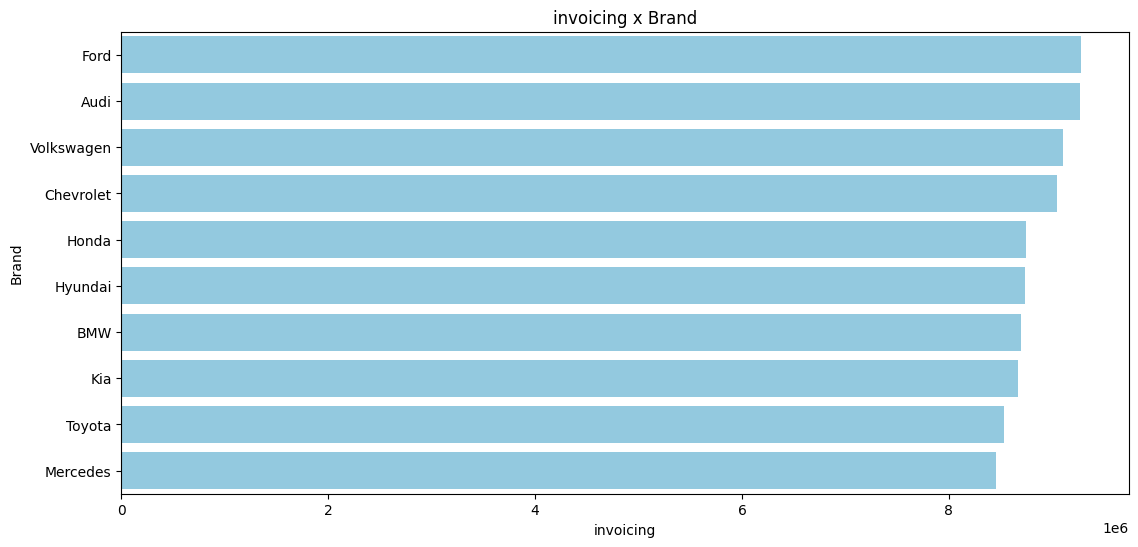

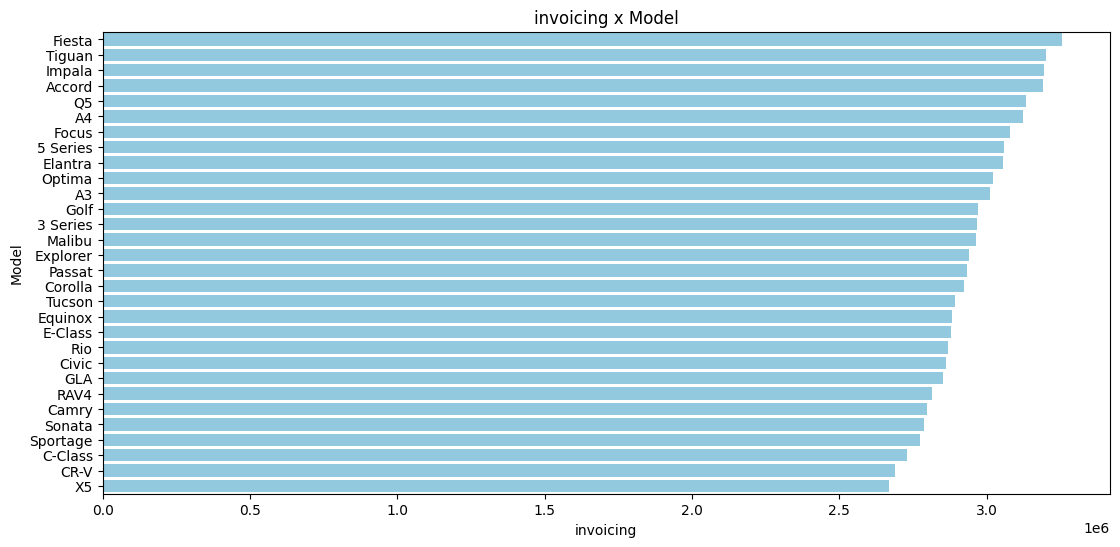

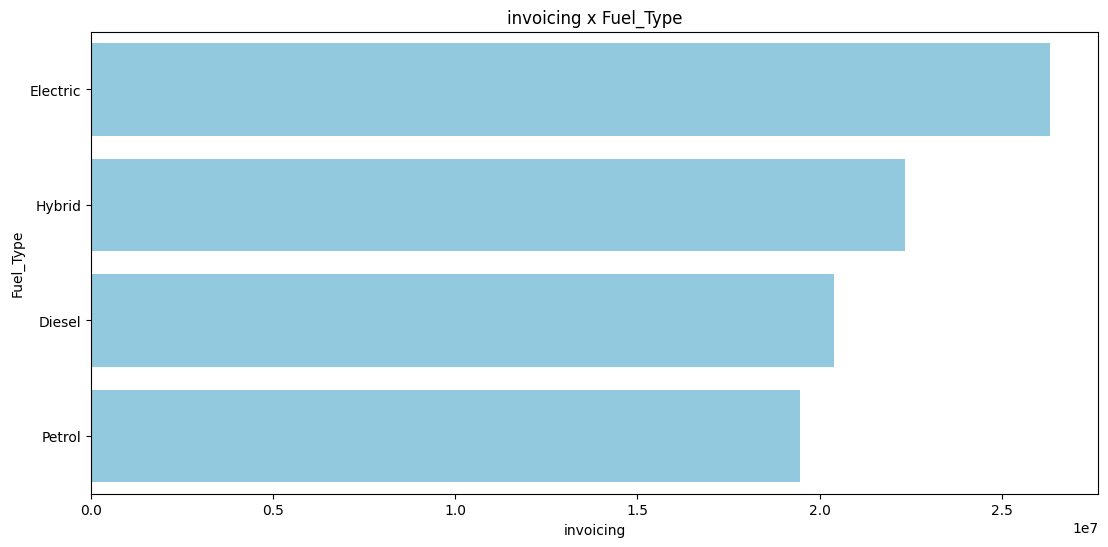

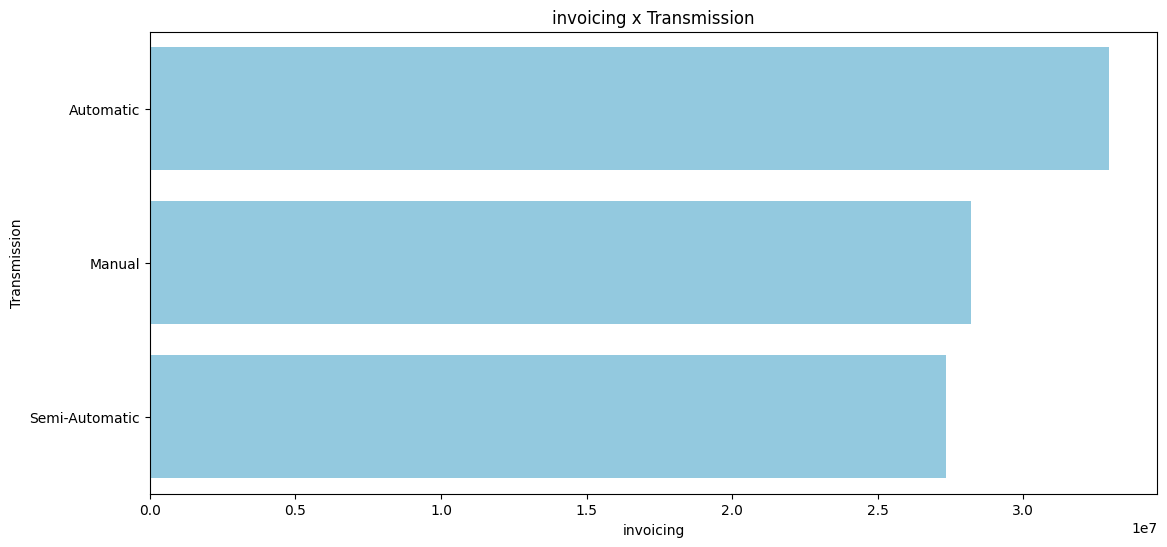

In [12]:
# Verificando o faturamento total de acordo com a coluna categória selecionada
# Exemplo: Faturamento total obtido pela marca do carro
for col in df.select_dtypes(include = 'object').columns:
    plt.figure(figsize = (13,6))
    groupby = df.groupby(col)['Price'].sum().reset_index(name='invoicing').sort_values(by='invoicing',ascending=False)
    sns.barplot(x = groupby['invoicing'].values, y = groupby[col].values, color = 'skyblue')
    plt.title(f'invoicing x {col}')
    plt.xlabel('invoicing')
    plt.ylabel(col)
    plt.show()

# Correlação e testes dos modelos de machine learning

In [13]:
# Copiando o dataset original para um novo dataset que vai ser utilizado no treino do modelo de machine learning
df_copy = df.copy()

In [14]:
# Biblioteca responsável por transformar variáveis categóricas em númericas
from sklearn.preprocessing import LabelEncoder

In [15]:
# Substituição das colunas categóricas em númericas
for col in df_copy.select_dtypes(include = 'object').columns:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df[col])

In [16]:
df_copy.head(3)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,2020,4.2,0,1,289944.0,3,5,8501.0
1,2,19,2012,2.0,2,0,5356.0,2,3,12092.0
2,7,16,2020,4.2,0,0,231440.0,4,2,11171.0


<Axes: >

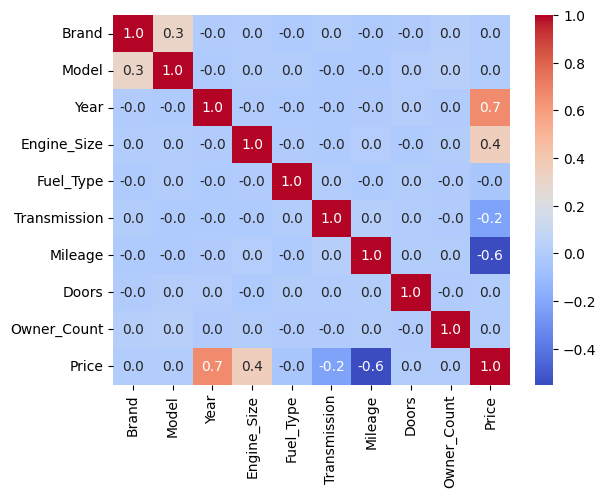

In [17]:
# Verificação da correlação das colunas presentes no dataset
corr = df_copy.corr()
sns.heatmap(corr, fmt = '.1f', annot = True, cmap = 'coolwarm')

In [18]:
# Escolha das variáveis independentes (Year, Engine_Size, Transmission, Mileage)
X = df_copy.drop(['Brand','Model','Fuel_Type','Doors','Owner_Count','Price'], axis = 1)
X = X.values
y = df_copy.iloc[:,-1].values

In [19]:
from sklearn.model_selection import train_test_split # Divisão de treino e teste
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # métricas de erros

In [20]:
# 30 % de treino e 70 % de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
# Importando os modelos de machine learning que serão utilizados
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB

In [22]:
# Instanciando os modelos
models = [LinearRegression(),
          DecisionTreeClassifier(),
         KNeighborsClassifier(),
         GaussianNB()]

models_names = ['LinearRegression',
               'DecisionTreeClassifier',
               'KNeighborsClassifier',
               'GaussianNB']

models_mean_absolute_error = []
models_r2 = []
models_mean_squared_error = []

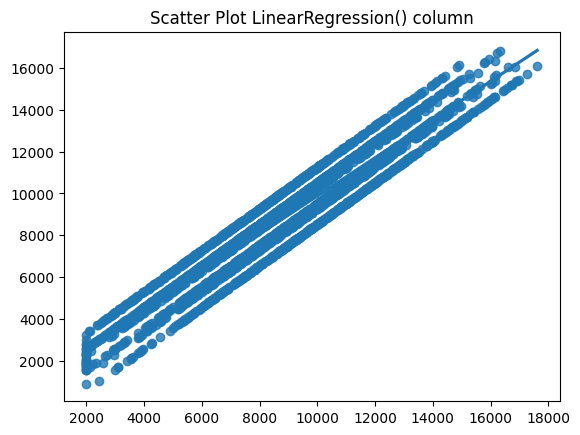

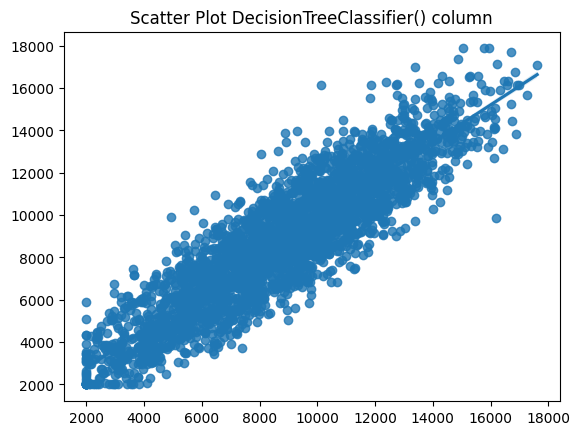

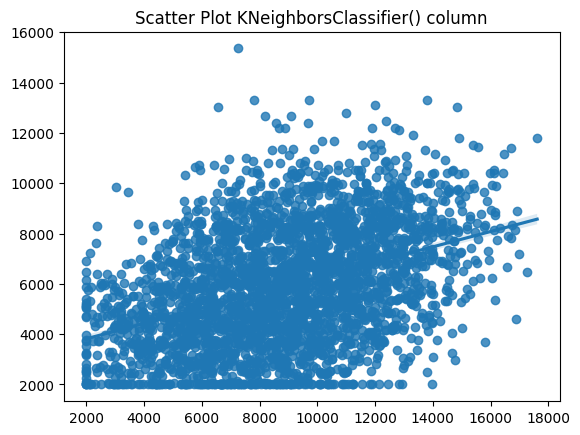

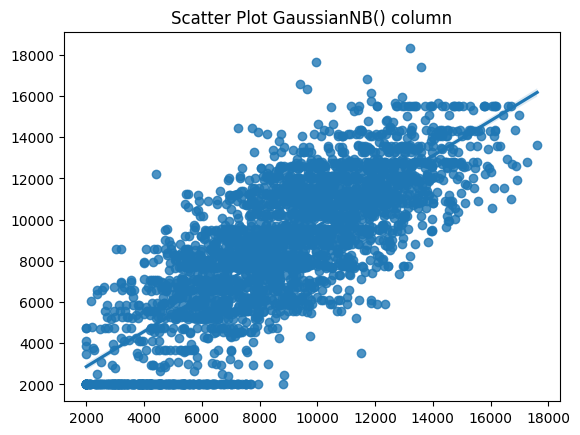

In [23]:
# Percorrendo o laço de repetição da lista dos modelos, fazendo o treino e calculando as métricas
# Plotando o scatter plot dos modelos
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    models_mean_absolute_error.append(mae)
    models_r2.append(r2)
    models_mean_squared_error.append(mse)

    sns.regplot(x = y_test, y = y_pred, x_jitter = 0.3)
    plt.title(f'Scatter Plot {str(model)} column')
    plt.show()

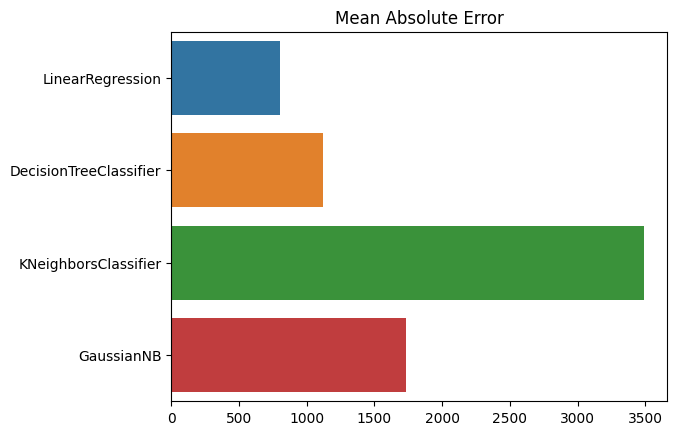

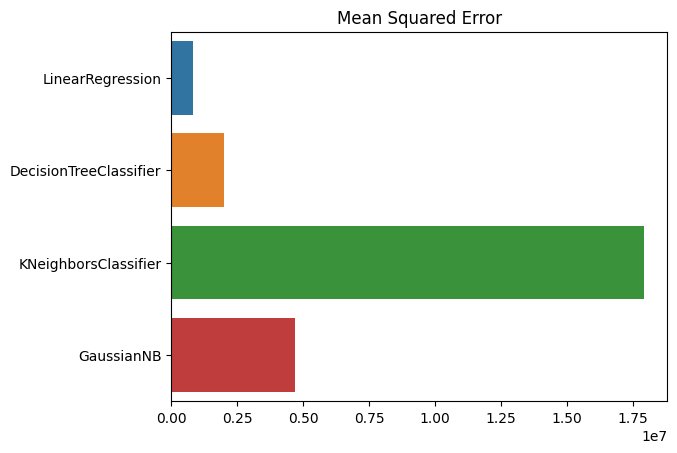

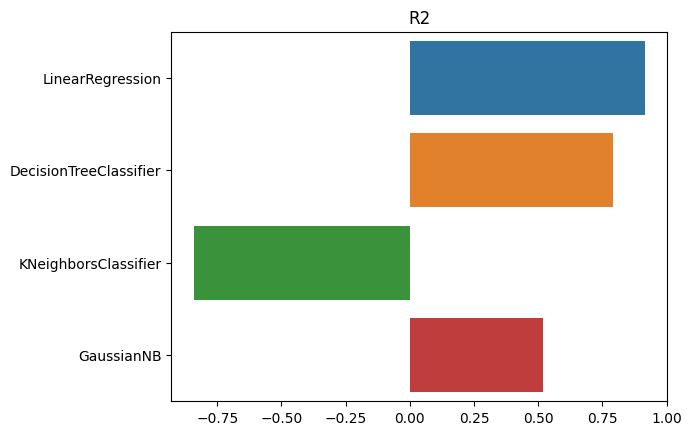

In [24]:
# Verificando os gráficos das métricas
sns.barplot(x = models_mean_absolute_error, y = models_names)
plt.title('Mean Absolute Error')
plt.show()
sns.barplot(x = models_mean_squared_error, y = models_names)
plt.title('Mean Squared Error')
plt.show()
sns.barplot(x = models_r2, y = models_names)
plt.title('R2')
plt.show()

In [25]:
for i in range(len(models)):
    print(f'Model {models_names[i]} | Mean Squared Error: {models_mean_squared_error[i]}')
    print(f'Model {models_names[i]} | Mean Absolute Error: {models_mean_absolute_error[i]}')
    print(f'Model {models_names[i]} | R2: {models_r2[i]}')
    print('')

Model LinearRegression | Mean Squared Error: 826487.335892766
Model LinearRegression | Mean Absolute Error: 800.874981630344
Model LinearRegression | R2: 0.9149942684669025

Model DecisionTreeClassifier | Mean Squared Error: 2011929.7706666666
Model DecisionTreeClassifier | Mean Absolute Error: 1118.9226666666666
Model DecisionTreeClassifier | R2: 0.7930693496180478

Model KNeighborsClassifier | Mean Squared Error: 17903225.675
Model KNeighborsClassifier | Mean Absolute Error: 3486.009666666667
Model KNeighborsClassifier | R2: -0.8413794491619009

Model GaussianNB | Mean Squared Error: 4676692.096333333
Model GaussianNB | Mean Absolute Error: 1731.787
Model GaussianNB | R2: 0.5189936789842711



# Conclusão

*Análisando os gráficos dos modelos treinados, gráficos de dispersão e das métricas de erros, é perceptível que o modelo que apresentou melhor performance de regressão foi o de Regressão Linear. Os valores obtidos foram: R2 - 0.91, MAE - 800, MSE - 826. Com base nos conhecimentos acerca das métricas e como são seus cálculos, quando menor o MSE e o MAE melhor é o modelo, assim como quanto mais próximo o R2 estiver perto de 1, melhor será o modelo.*
